In [21]:
file_prefix <- "ch09.1"
reuse_fit <- T
source("preset.R")

input_file <- "data/TherapeuticTouchData.csv"

# data

In [3]:
data <- read_csv("data/TherapeuticTouchData.csv") %>% 
  mutate(s = factor(s))
stan_data <- list(
  N = nrow(data), 
  K = n_distinct(data$s), 
  y = data$y, 
  s = as.integer(data$s)
)

Parsed with column specification:
cols(
  y = col_double(),
  s = col_character()
)



# fit

In [4]:
fit <- stan(file = "model/ch09.1.stan", data = stan_data, seed = 123, 
            pars = c("kappa_minus2"), include = F, 
            chains = 4, warmup = 1000, iter = 5000, thin = 1)

Loading required namespace: coda



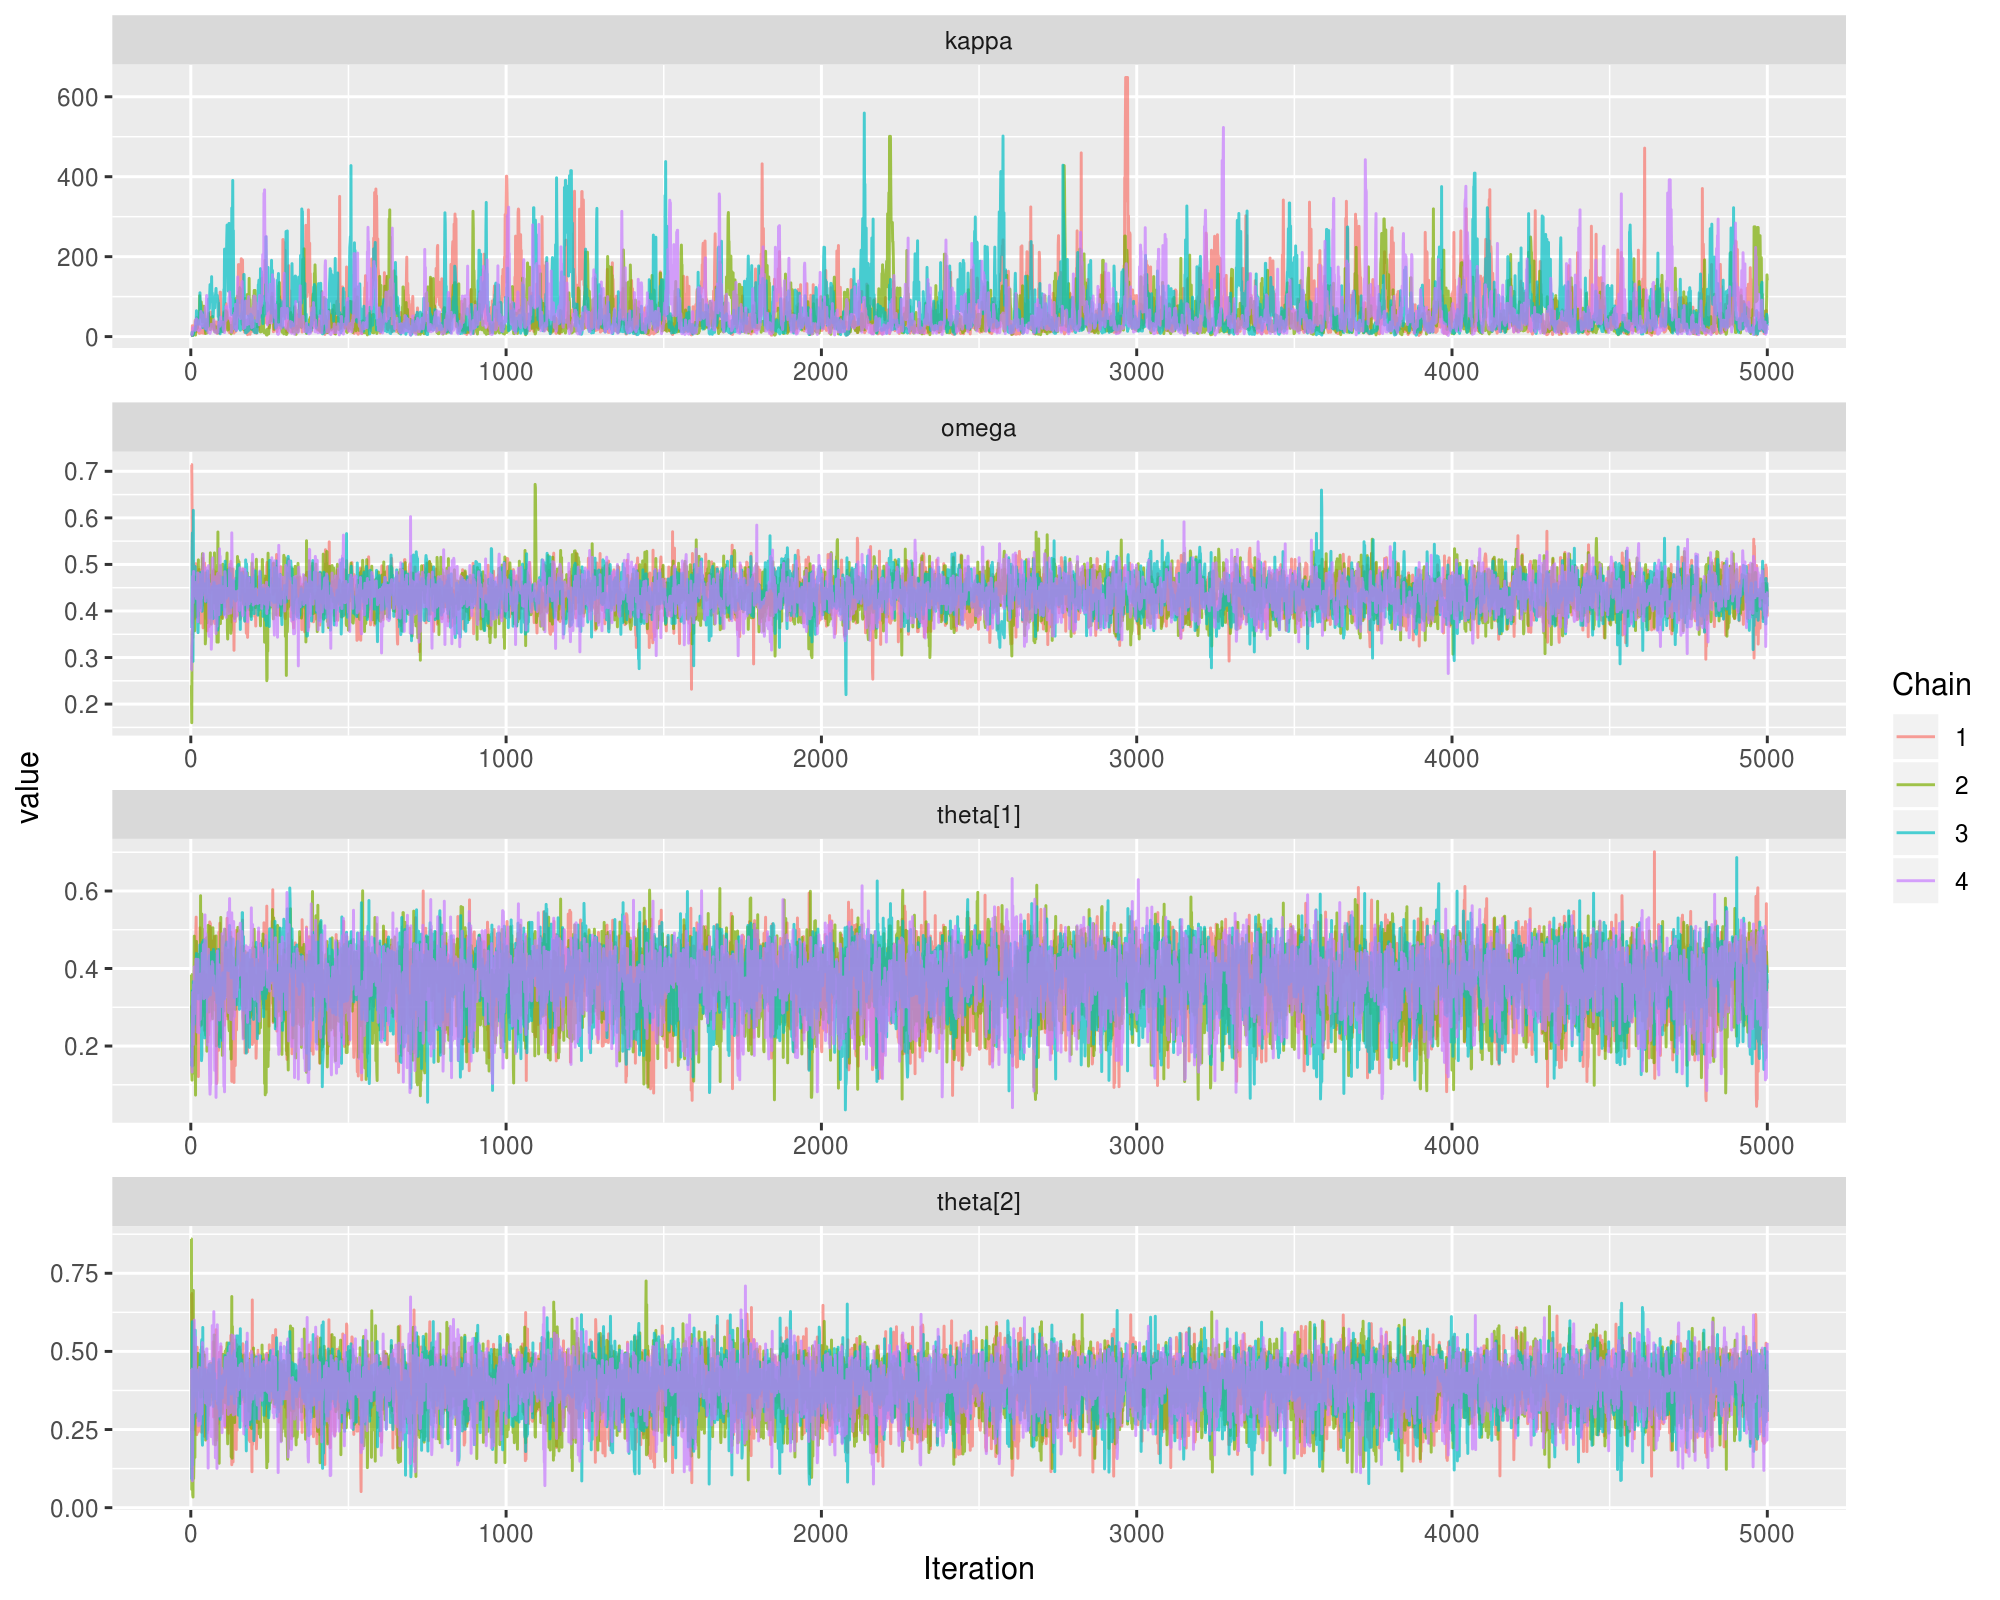

In [5]:
set_plot_size(10, 8)
interests_pars <- "kappa|omega|theta\\[[12]\\]"
ggs_traceplot(ggs(fit, family = interests_pars, inc_warmup = T))

In [9]:
ggmcmc(ggs(fit, family = interests_pars), file = plot_file_name("diag"))

Plotting histograms
Plotting density plots
Plotting traceplots
Plotting running means
Plotting comparison of partial and full chain
Plotting autocorrelation plots
Plotting crosscorrelation plot
Plotting Potential Scale Reduction Factors
Plotting Number of effective independent draws
Plotting Geweke Diagnostic


Joining, by = c("Parameter", "Chain", "part")


Plotting caterpillar plot
Time taken to generate the report: 5.9 seconds.


# result

In [6]:
# result
res <- fit_to_tibble(fit)
mle <- data %>% group_by(s) %>% summarise(m = mean(y))
get_mle <- function(i) (mle %>% filter(s == i))$m

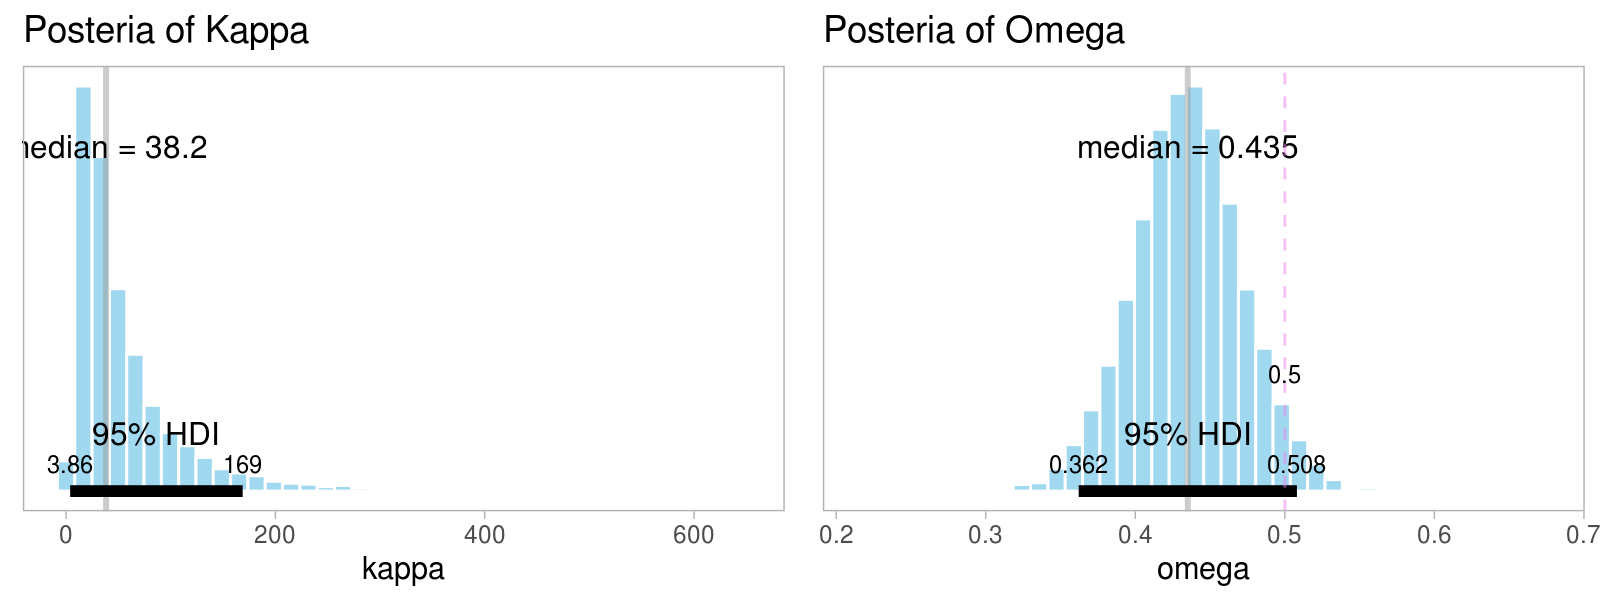

In [10]:
set_plot_size(8, 3)
grid.arrange(
  plot_post(res, kappa, title = "Posteria of Kappa"), 
  plot_post(res, omega, comp_val = 0.5, title = "Posteria of Omega"), 
  ncol = 2
)

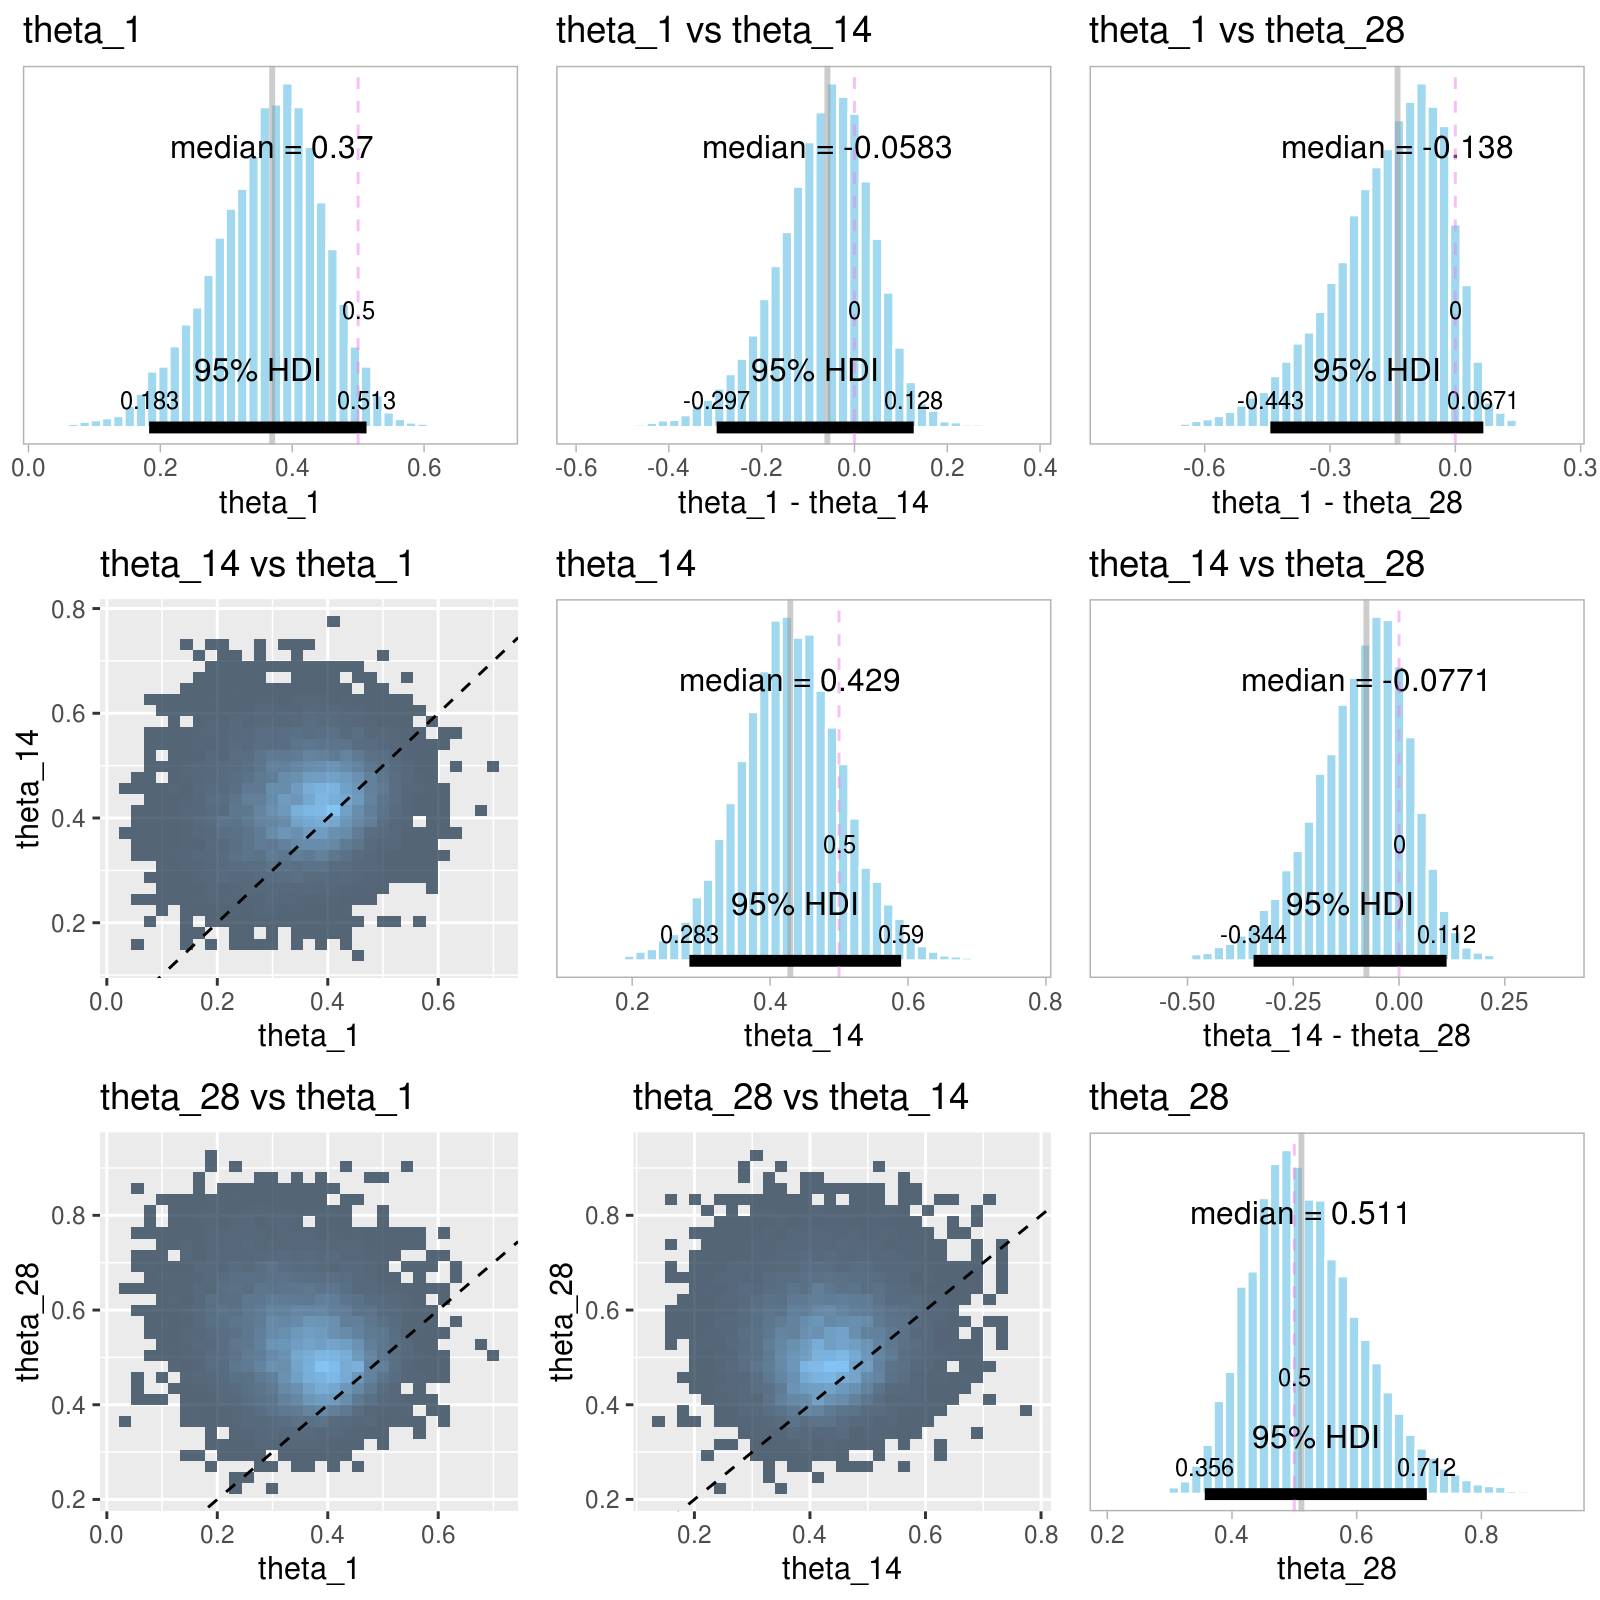

In [62]:
set_plot_size(8, 8)
plot_post_pair_diff(res, c(1, 14, 28), par_prefix = "theta", comp_val = 0.5, mle_func = get_mle)

In [10]:
seq(1, 100, length = 100)

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

In [13]:
summary(fit)$summary

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
omega,0.4350535,0.0005474283,0.03692424,0.3616331,0.4117139,0.4350964,0.4589116,0.5076630,4549.552,0.9999446
theta[1],0.3619029,0.0013008137,0.08484881,0.1798085,0.3084412,0.3696752,0.4205856,0.5113584,4254.625,1.0003868
theta[2],0.3845072,0.0010676572,0.08155056,0.2077977,0.3340655,0.3901728,0.4399531,0.5321938,5834.320,1.0003034
theta[3],0.4075800,0.0008147632,0.07947327,0.2390983,0.3592621,0.4106337,0.4586771,0.5615904,9514.354,1.0003902
theta[4],0.4069510,0.0007822392,0.07802784,0.2438579,0.3578518,0.4090625,0.4575129,0.5581087,9949.929,1.0002691
theta[5],0.4074321,0.0008046654,0.07834840,0.2426134,0.3588699,0.4102713,0.4580056,0.5572727,9480.466,1.0001088
theta[6],0.4078782,0.0007910712,0.07917360,0.2419567,0.3576480,0.4103945,0.4600650,0.5610178,10016.815,0.9999875
theta[7],0.4069048,0.0007828072,0.07917101,0.2406714,0.3581600,0.4097761,0.4582431,0.5600406,10228.754,1.0000085
theta[8],0.4073508,0.0008198417,0.07821926,0.2465992,0.3578969,0.4095598,0.4594520,0.5594115,9102.641,1.0000802
theta[9],0.4082929,0.0008146366,0.07929535,0.2415913,0.3595585,0.4108431,0.4600029,0.5610610,9474.747,1.0005840
